In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat

In [2]:
df=pd.read_csv('Sales_add.csv')

In [3]:
df.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [4]:
df.tail()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
17,Month-18,Region - C,Manager - B,167996,191517
18,Month-19,Region - B,Manager - A,132135,227040
19,Month-20,Region - A,Manager - B,152493,212579
20,Month-21,Region - B,Manager - A,147425,263388
21,Month-22,Region - A,Manager - C,130263,243020


In [5]:
df.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


In [6]:
df.isna().sum()

Month                             0
Region                            0
Manager                           0
Sales_before_digital_add(in $)    0
Sales_After_digital_add(in $)     0
dtype: int64

# The company wishes to clarify whether there is any increase in sales after stepping into digital marketing


C:\Users\look at me\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales_before_digital_add(in $)'>

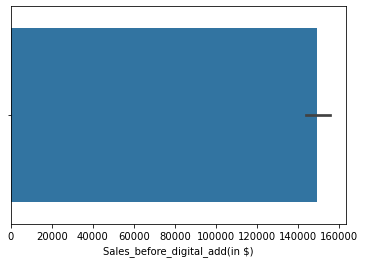

In [7]:
sns.barplot(df['Sales_before_digital_add(in $)'])

C:\Users\look at me\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales_After_digital_add(in $)'>

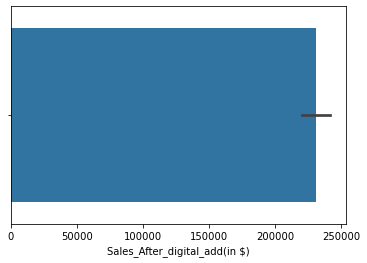

In [8]:
sns.barplot(df['Sales_After_digital_add(in $)'])

C:\Users\look at me\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales_before_digital_add(in $)', ylabel='Density'>

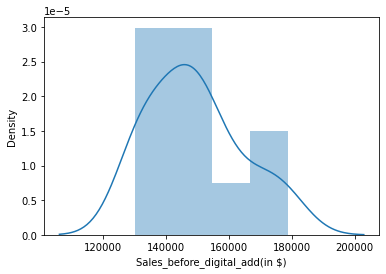

In [9]:
sns.distplot(df['Sales_before_digital_add(in $)'])

C:\Users\look at me\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales_After_digital_add(in $)', ylabel='Density'>

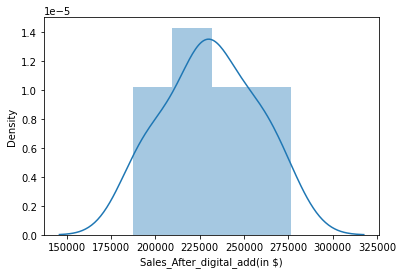

In [10]:
sns.distplot(df['Sales_After_digital_add(in $)'])

Defining null hypothesis and alternative hypothesis

In [11]:
from scipy.stats import ttest_ind

In [12]:
before_add=df['Sales_before_digital_add(in $)']
after_add=df['Sales_After_digital_add(in $)']
stat,p=ttest_ind(before_add,after_add)
print('p value is : ',p)
if p>0.05:
    print('No increase in sales')
else:
    print('There is increase in sales')

p value is :  2.614368006904645e-16
There is increase in sales


from the above we can reject our null hypothesis.
There is significant increase in sales after digital marketing

# check whether there is any dependency between the features “Region” and “Manager”.


In [13]:
df.head()


,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [14]:
df=pd.crosstab(df['Region'],df['Manager'])

In [15]:
df

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


HO : There is no dependency between region and manager
Ha : There is significant dependency between region and manager

In [16]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(df)
print('p value is : ',p)
if p>0.05:
    print('No dependency')
else:
    print('significant dependency')

p value is :  0.5493991051158094
No dependency


from the test we can conclude  that there is no dependeny between region and manager.
we are unable to reject the null hypothesis